In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
data = pd.read_csv("Dataset Task 2.csv")

In [16]:
data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [17]:
data.rename(columns={'room_id/id':'room_id'}, inplace=True)

In [18]:
data.head()

,id,room_id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [19]:
data.tail()

,id,room_id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,Room Admin,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,Room Admin,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,Room Admin,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,Room Admin,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,Room Admin,28-07-2018 07:06,31,In


**observation** : seems like there is no use with **room_id** . so we are going to drop this column. 

In [20]:
data.drop("room_id" , inplace=True,axis = 1)

In [21]:
data.tail()

,id,noted_date,temp,out/in
97601,__export__.temp_log_91076_7fbd08ca,28-07-2018 07:07,31,In
97602,__export__.temp_log_147733_62c03f31,28-07-2018 07:07,31,In
97603,__export__.temp_log_100386_84093a68,28-07-2018 07:06,31,In
97604,__export__.temp_log_123297_4d8e690b,28-07-2018 07:06,31,In
97605,__export__.temp_log_133741_32958703,28-07-2018 07:06,31,In


In [22]:
#deleting id 
data.drop("id",inplace = True, axis = 1)

In [23]:
data.tail()

,noted_date,temp,out/in
97601,28-07-2018 07:07,31,In
97602,28-07-2018 07:07,31,In
97603,28-07-2018 07:06,31,In
97604,28-07-2018 07:06,31,In
97605,28-07-2018 07:06,31,In


In [28]:
print(data.describe())
print("*"*20)
print(data.info())

               temp
count  97606.000000
mean      35.053931
std        5.699825
min       21.000000
25%       30.000000
50%       35.000000
75%       40.000000
max       51.000000
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 3 columns):
noted_date    97606 non-null object
temp          97606 non-null int64
out/in        97606 non-null object
dtypes: int64(1), object(2)
memory usage: 2.2+ MB
None


**Observation**: we have maximum temperature of **51** degrees and minimum of **21** degrees.

In [29]:
data.shape

(97606, 3)

**observations**: our data set has **97606** rows and **3** columns.

In [30]:
data.columns

Index(['noted_date', 'temp', 'out/in'], dtype='object')

In [31]:
data['temp'].value_counts()

39    10203
28     8831
29     7922
40     7798
31     7236
30     6614
37     5723
32     5408
27     4631
41     4354
36     3965
38     3867
42     3447
33     3437
34     2613
43     2004
44     1774
35     1582
45     1508
46     1201
47     1044
48      971
26      699
49      401
25      224
24       66
50       55
22       19
23        5
51        2
21        2
Name: temp, dtype: int64

**Observations**: we have more coulmns(10203) with **39** degrees and a couple with **21** degrees.

In [34]:
data['out/in'].value_counts()

Out    77261
In     20345
Name: out/in, dtype: int64

**observation**: so we have 77261 samples with outside temperature and 20345 with inside temperature.

In [39]:
data['noted_date'] = pd.to_datetime(data['noted_date'])

In [40]:
data.head()

,noted_date,temp,out/in
0,2018-08-12 09:30:00,29,In
1,2018-08-12 09:30:00,29,In
2,2018-08-12 09:29:00,41,Out
3,2018-08-12 09:29:00,41,Out
4,2018-08-12 09:29:00,31,In


In [41]:
data['month'] = data.noted_date.dt.month

In [42]:
data.head()

,noted_date,temp,out/in,month
0,2018-08-12 09:30:00,29,In,8
1,2018-08-12 09:30:00,29,In,8
2,2018-08-12 09:29:00,41,Out,8
3,2018-08-12 09:29:00,41,Out,8
4,2018-08-12 09:29:00,31,In,8


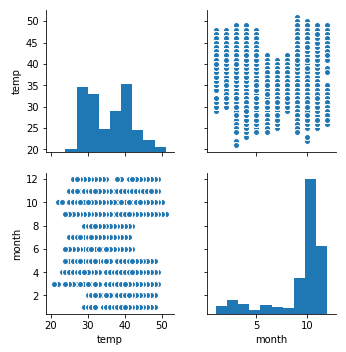

In [44]:
sns.pairplot(data)

/home/purna/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/purna/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


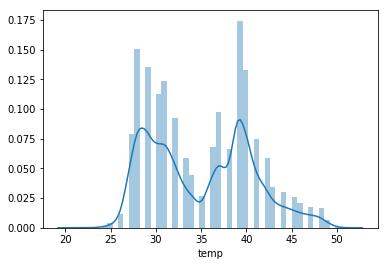

In [46]:
sns.distplot(data['temp'])

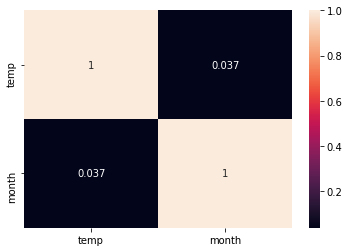

In [47]:
sns.heatmap(data.corr(),annot= True)

/home/purna/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


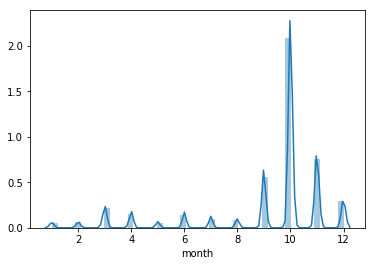

In [50]:
sns.distplot(data['month'])

**Observations** : both the pair plot and distplot says that we have **more samples in october month** and **less samples in january**

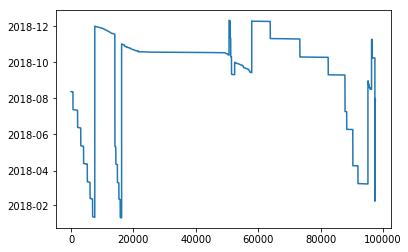

In [56]:
data['noted_date'].plot()